In [18]:
from Bio.Seq import Seq
from Bio import SeqIO
from collections import Counter
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,classification_report,confusion_matrix
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import json
import time
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import nglview as nv
import os
import sklearn

In [19]:
datadir = 'C:\\Users\\kunjk\\OneDrive\\Desktop\\project\\dataset\\genes'

In [20]:
aa = os.listdir(datadir)[1]

In [21]:
aa

'alpha_synclein.fasta'

In [22]:
df = pd.read_excel('C:\\Users\\kunjk\\OneDrive\\Desktop\\project\\dataset\\genes\\aminoacids.xlsx')

In [23]:
df.head()

,amino_acids,count,location,gene
0,NFP,3,neural tissue,SNCA
1,KT,2,neural tissue,SNCA
2,MSSSISHIFSFHRDMAL,17,neural tissue,SNCA
3,D,1,neural tissue,SNCA
4,FKLQTAEKCKITVA,14,neural tissue,SNCA


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   amino_acids  3073 non-null   object
 1   count        3271 non-null   int64 
 2   location     3271 non-null   object
 3   gene         3271 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.3+ KB


In [25]:
df.isnull().sum()

amino_acids    198
count            0
location         0
gene             0
dtype: int64

In [26]:
len(df)

3271

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

amino_acids    0
count          0
location       0
gene           0
dtype: int64

C:\Users\kunjk\kunj\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


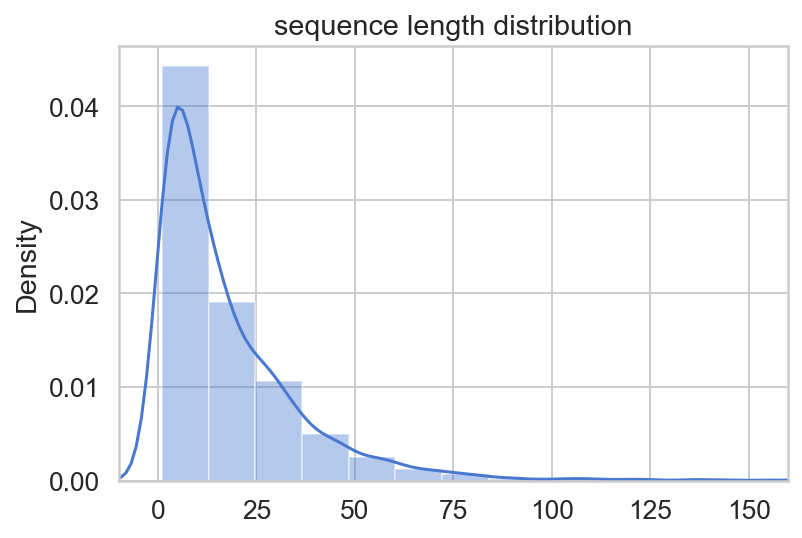

In [29]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid',palette='muted',font_scale=1.2)
ax = sns.distplot(df['count'].values,bins=20)
ax.set_xlim(-10,160)
plt.title(f'sequence length distribution')
plt.grid(True) 
#mostly data covered with in the range of 40

In [30]:
df.columns

Index(['amino_acids', 'count', 'location', 'gene'], dtype='object')

In [31]:
categories = df.location.astype('category').cat
df['location'] = categories.codes
class_name = categories.categories
num_classes = len(class_name)
print(class_name)

Index(['mitochondria', 'neural tissue', 'outer membrane of mitchondria'], dtype='object')


In [32]:
df.head()

,amino_acids,count,location,gene
0,NFP,3,1,SNCA
1,KT,2,1,SNCA
2,MSSSISHIFSFHRDMAL,17,1,SNCA
3,D,1,1,SNCA
4,FKLQTAEKCKITVA,14,1,SNCA


In [33]:
categories = df.gene.astype('category').cat
df['gene'] = categories.codes
class_name = categories.categories
num_classes = len(class_name)
print(class_name)

Index(['SNCA', 'parkin', 'pink1'], dtype='object')


In [34]:
df.head()

,amino_acids,count,location,gene
0,NFP,3,1,0
1,KT,2,1,0
2,MSSSISHIFSFHRDMAL,17,1,0
3,D,1,1,0
4,FKLQTAEKCKITVA,14,1,0


In [35]:
#shuffle the data
df = sklearn.utils.shuffle(df,random_state=101)
df = df.reset_index(drop=True)
df.head()

,amino_acids,count,location,gene
0,QGHLSYLFTN,10,1,0
1,FYCHIFRIVLFKYIQNTEYINKVFQKPGKNSGFFQR,36,1,0
2,T,1,1,0
3,SEPMGNLRTPTTTASTLGNQGVWG,24,1,0
4,AWAPTHTDILKDHFLKIFSTVYCAFLLYPHT,31,1,0


In [36]:
len(df)

3073

In [38]:
df_train = df[:2950]
df_test = df[2950:]


In [39]:

df_train.to_csv('train.csv')
df_test.to_csv('test.csv')